In [8]:
import sys
sys.path.append("/u/dssc/zenocosini/helm_suite/MCQA_Benchmark")
from metrics.utils import *
from metrics.query import DataFrameQuery
from common.utils import *

#from sklearn.feature_selection import mutual_info_regression MISSIN?
from dadapy.data import Data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from sklearn.decomposition import KernelPCA
from sklearn.metrics import pairwise_distances
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
import seaborn as sns
import tqdm

from pathlib import Path
from collections import Counter
!export OMP_NUM_THREADS=20

In [4]:
_PATH_RESULT = Path("/orfeo/cephfs/home/dssc/zenocosini/helm_suite/MCQA_Benchmark/metrics/cluster_cartoon")

In [16]:
def angular_distance(mat):
    """
    Computes distance based on angles between vectors, over the rows of the matrix
    """
    dot_product = mat @ mat.T
    norm_vector = np.linalg.norm(mat, axis=1)
    stacked_vector = np.tile(norm_vector, (mat.shape[0], 1))
    norm_product = stacked_vector.T*stacked_vector

    cosine_similarity = dot_product / norm_product
    cosine_similarity = np.clip(cosine_similarity, -1, 1)
    distances = np.arccos(cosine_similarity) / np.pi
    return distances

In [4]:
def softmax(x):
    exp_values = np.exp(x)# - np.max(x, axis=-1, keepdims=True))
    probabilities = exp_values / np.sum(exp_values, axis=-1, keepdims=True)
    return probabilities

In [7]:
tsm = TensorStorageManager()
dict_query_i = {"method":"last",
              "model_name": "meta-llama/Llama-3-8b-hf",
              "train_instances": 5}
dict_query_j = {"method":"last",
              "model_name": "meta-llama/Llama-3-8b-chat-hf",
              "train_instances": 0}
query_i = DataFrameQuery(dict_query_i)
query_j = DataFrameQuery(dict_query_j)
hidden_states_i,logits_i, hidden_states_stat_i = tsm.retrieve_tensor(query_i, "npy")
hidden_states_j,logits_j, hidden_states_stat_j = tsm.retrieve_tensor(query_j, "npy")

In [17]:
overlap_ad = []
for layer in tqdm.tqdm(range(1,hidden_states_i.shape[1]), desc="Computing layer overlap.."):
    hi = hidden_states_i[:,layer,:]
    hj = hidden_states_j[:,layer,:]
    
    dist_i = angular_distance(hi)
    dist_j = angular_distance(hj)
    
    data_ad = Data(distances=dist_i, maxk = 1000)
    data_ad.compute_neigh_indices()
    overlap_ad.append(data_ad.return_data_overlap(distances=dist_j, k=500))
with open(Path(_PATH_RESULT, f'overlap.pkl'), "wb") as f:
    pickle.dump(overlap_ad,f)

Computing layer overlap..:   0%|                                                                                                                                                           | 0/32 [00:00<?, ?it/s]/orfeo/cephfs/home/dssc/zenocosini/helm_suite/DADApy/dadapy/kstar.py:101: UserWarning: Careful! The intrinsic dimension is not defined. Computing it unsupervisedly with 'compute_id_2NN()' method
  warnings.warn(
/orfeo/cephfs/home/dssc/zenocosini/helm_suite/DADApy/dadapy/id_estimation.py:175: RuntimeWarning: divide by zero encountered in divide
  mus = self.distances[:, 2] / self.distances[:, 1]
Computing layer overlap..: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [14:49<00:00, 27.81s/it]


In [18]:
overlap_ad

[0.4483788019089678,
 0.43193261628321106,
 0.40930707315335857,
 0.431827765510364,
 0.44990782819289127,
 0.46881672483795145,
 0.4763990312700334,
 0.4974284493197521,
 0.5407154355723341,
 0.5598038321817793,
 0.6005248237053922,
 0.599593988175796,
 0.597459220742218,
 0.5975780326234063,
 0.5857243393404089,
 0.5544665574471116,
 0.542318826127217,
 0.48265517487000503,
 0.4671207350950922,
 0.4661438848920863,
 0.4623199658095306,
 0.4593630600470119,
 0.453390982263694,
 0.4550505021725194,
 0.4458750623263765,
 0.43666543201082697,
 0.4303676900064108,
 0.43039105349383855,
 0.4179401666785384,
 0.4228952204572975,
 0.41045131419616787,
 0.38011510791366904]

In [19]:
tsm = TensorStorageManager()
dict_query_i = {"method":"last",
              "model_name": "meta-llama/Llama-3-8b-hf",
              "train_instances": 5}
dict_query_j = {"method":"last",
              "model_name": "meta-llama/Llama-3-8b-hf",
              "train_instances": 0}
query_i = DataFrameQuery(dict_query_i)
query_j = DataFrameQuery(dict_query_j)
hidden_states_i,logits_i, hidden_states_stat_i = tsm.retrieve_tensor(query_i, "npy")
hidden_states_j,logits_j, hidden_states_stat_j = tsm.retrieve_tensor(query_j, "npy")

overlap_bl = []
for layer in tqdm.tqdm(range(1,hidden_states_i.shape[1]), desc="Computing layer overlap.."):
    hi = hidden_states_i[:,layer,:]
    hj = hidden_states_j[:,layer,:]
    
    dist_i = angular_distance(hi)
    dist_j = angular_distance(hj)
    
    data_ad = Data(distances=dist_i, maxk = 1000)
    data_ad.compute_neigh_indices()
    overlap_bl.append(data_ad.return_data_overlap(distances=dist_j, k=500))
with open(Path(_PATH_RESULT, f'overlap_bl.pkl'), "wb") as f:
    pickle.dump(overlap_bl,f)

Computing layer overlap..:   0%|                                                                                                                                                           | 0/32 [00:00<?, ?it/s]/orfeo/cephfs/home/dssc/zenocosini/helm_suite/DADApy/dadapy/kstar.py:101: UserWarning: Careful! The intrinsic dimension is not defined. Computing it unsupervisedly with 'compute_id_2NN()' method
  warnings.warn(
/orfeo/cephfs/home/dssc/zenocosini/helm_suite/DADApy/dadapy/id_estimation.py:175: RuntimeWarning: divide by zero encountered in divide
  mus = self.distances[:, 2] / self.distances[:, 1]
Computing layer overlap..: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [15:02<00:00, 28.20s/it]


In [20]:
tsm = TensorStorageManager()
dict_query_i = {"method":"last",
              "model_name": "meta-llama/Llama-3-8b-chat-hf",
              "train_instances": 5}
dict_query_j = {"method":"last",
              "model_name": "meta-llama/Llama-3-8b-chat-hf",
              "train_instances": 0}
query_i = DataFrameQuery(dict_query_i)
query_j = DataFrameQuery(dict_query_j)
hidden_states_i,logits_i, hidden_states_stat_i = tsm.retrieve_tensor(query_i, "npy")
hidden_states_j,logits_j, hidden_states_stat_j = tsm.retrieve_tensor(query_j, "npy")

overlap_bl1 = []
for layer in tqdm.tqdm(range(1,hidden_states_i.shape[1]), desc="Computing layer overlap.."):
    hi = hidden_states_i[:,layer,:]
    hj = hidden_states_j[:,layer,:]
    
    dist_i = angular_distance(hi)
    dist_j = angular_distance(hj)
    
    data_ad = Data(distances=dist_i, maxk = 1000)
    data_ad.compute_neigh_indices()
    overlap_bl1.append(data_ad.return_data_overlap(distances=dist_j, k=500))
with open(Path(_PATH_RESULT, f'overlap_bl1.pkl'), "wb") as f:
    pickle.dump(overlap_bl,f)

Computing layer overlap..:   0%|                                                                                                                                                           | 0/32 [00:00<?, ?it/s]/orfeo/cephfs/home/dssc/zenocosini/helm_suite/DADApy/dadapy/kstar.py:101: UserWarning: Careful! The intrinsic dimension is not defined. Computing it unsupervisedly with 'compute_id_2NN()' method
  warnings.warn(
/orfeo/cephfs/home/dssc/zenocosini/helm_suite/DADApy/dadapy/id_estimation.py:175: RuntimeWarning: divide by zero encountered in divide
  mus = self.distances[:, 2] / self.distances[:, 1]
Computing layer overlap..: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [13:47<00:00, 25.85s/it]


# Plot

In [6]:
with open(Path(_PATH_RESULT, f'overlap_bl.pkl'), "rb") as f:
    overlap_baseline = pickle.load(f)
    
with open(Path(_PATH_RESULT, f'overlap_bl1.pkl'), "rb") as f:
    overlap_baseline_finetuned = pickle.load(f)

with open(Path(_PATH_RESULT, f'overlap.pkl'), "rb") as f:
    overlap = pickle.load(f)

In [11]:
def point_overlap(overlaps, overlaps_baseline, overlaps_baseline_finetuned, title):
    sns.set_style("whitegrid")
    layers = np.arange(0,1,1/overlaps.shape[0])

    overlaps_baseline[0]=1
    overlaps[0]=1
    overlaps_baseline_finetuned[0]=1

    plt.figure(figsize=(12, 8))
    sns.lineplot(
        x=layers,
        y=overlaps_baseline,
        label="0 shot pt vs 5 shot pt"
    )
    sns.lineplot(
        x=layers,
        y=overlaps,
        label="5 shot pt vs 0 shot ft"
    )
    sns.lineplot(
        x=layers,
        y=overlaps_baseline_finetuned,
        label="0 shot ft vs 5 shot ft"
    )
    sns.scatterplot(
        x=layers,
        y=overlaps_baseline,
    )
    sns.scatterplot(
        x=layers,
        y=overlaps,
    )
    sns.scatterplot(
        x=layers,
        y=overlaps_baseline_finetuned,
    )
    #plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    #plt.title(f"{couple1[0].split('/')[1],couple1[1].split('/')[1]} k={k}")
    plt.xlabel("relative depth", fontsize=23)
    plt.ylabel("layer overlap", fontsize=23)
    plt.legend(fontsize = 16)
    plt.title(title,fontsize=25)
    #print(f"{couple1} k={k}")
    plt.show()

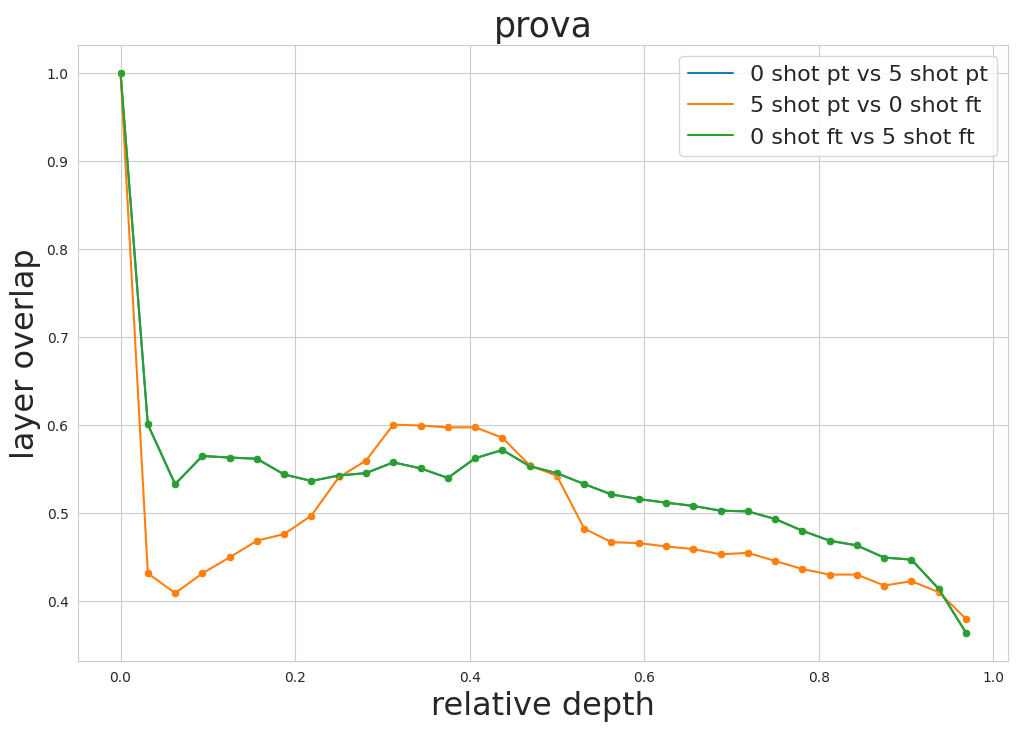

In [12]:
point_overlap(np.array(overlap), np.array(overlap_baseline), np.array(overlap_baseline_finetuned), "prova")